In [16]:
import sys
sys.path.append("E:/graduate_study/Machine Learning/")
from VWAP import basic_vwap
from Execution_signal import execution
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt



In [17]:
dir_data = "aapl_signal.csv"
data = pd.read_csv('E:/graduate_study/Machine Learning/'+dir_data)

# run vwap and all date results are in VWAP
VWAP = basic_vwap(data, None)
VWAP._historical_cdf()
VWAP._VWAP()


In [26]:
# run strategy and all things ready to play in execution_strategy
r = ([0.00018540385841424813, 0.00019730658105338646, 0.0003623564039380093, 0.0006224806392869604, 0.0006264755945804102], [2.8591412486349406e-05, 0.00017477819656313643, 0.0004727381734393411, 0.0006218296307207129, 0.0007317083530385608])
execution_strategy = execution(data, r)
execution_strategy._historical_cdf()


time
09 30    0.028062
09 31    0.034741
09 32    0.039698
09 33    0.045311
09 34    0.051156
09 35    0.055666
09 36    0.060559
09 37    0.065450
09 38    0.073103
09 39    0.076471
09 40    0.079236
09 41    0.082134
09 42    0.087928
09 43    0.092686
09 44    0.096701
09 45    0.102794
09 46    0.109824
09 47    0.115508
09 48    0.120884
09 49    0.126040
09 50    0.129619
09 51    0.134475
09 52    0.139263
09 53    0.142944
09 54    0.147955
09 55    0.151611
09 56    0.155015
09 57    0.158142
09 58    0.160626
09 59    0.164683
           ...   
15 30    0.892910
15 31    0.895868
15 32    0.898002
15 33    0.900053
15 34    0.902368
15 35    0.904756
15 36    0.906933
15 37    0.909523
15 38    0.911880
15 39    0.915392
15 40    0.919216
15 41    0.922024
15 42    0.925390
15 43    0.927891
15 44    0.932147
15 45    0.935296
15 46    0.938122
15 47    0.941556
15 48    0.944101
15 49    0.947784
15 50    0.951555
15 51    0.956309
15 52    0.959073
15 53    0.962011
15 54

In [19]:
###########Single-day analysis
# choose the analyzing date
T = dt.date(2018, 12, 28)  # input for vwap class
t = '2018-12-28'  # input for signal class
execution_strategy._VWAP(t)

tradingday is : 2018-12-28 00:00:00


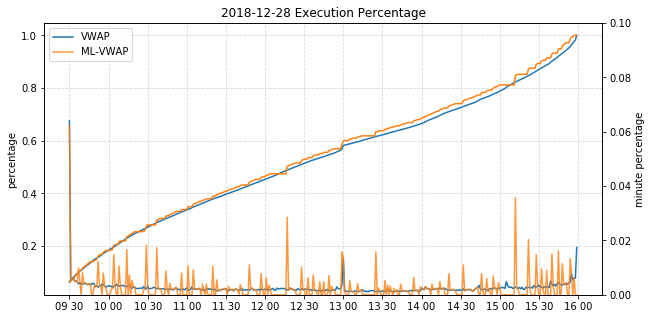

In [20]:
#####cumulative execution percentage
vwap_pct = VWAP.execution_percent[T]
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax1.grid(True, linestyle="--", alpha=0.5)
ax1.plot(vwap_pct)
ax1.plot(execution_strategy.execution_percent)
ax1.set_ylabel('percentage')
##minute execution percentage
vwap_vol = pd.Series.diff(vwap_pct)
vwap_vol[0] = vwap_pct[0]
ax2 = ax1.twinx()
ax2.plot(vwap_vol)
ax2.plot(execution_strategy.execution_PDF, alpha=0.8)
ax2.set_ylim([0, 0.1])
ax2.set_ylabel('minute percentage')

# WARNING: not generally applicable time_ticker
time_ticker = np.append(np.array(vwap_pct.index[:]), "16 00")
plt.xticks(np.arange(0, len(time_ticker), 30), time_ticker[0:len(time_ticker):30], fontsize=8)
plt.title('%s Execution Percentage' % T.strftime('%Y-%m-%d'))
plt.legend(labels=['VWAP', 'ML-VWAP'], loc='upper left')
plt.show()
plt.close()

c:\users\zyd_jason\appdata\local\programs\python\python35\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


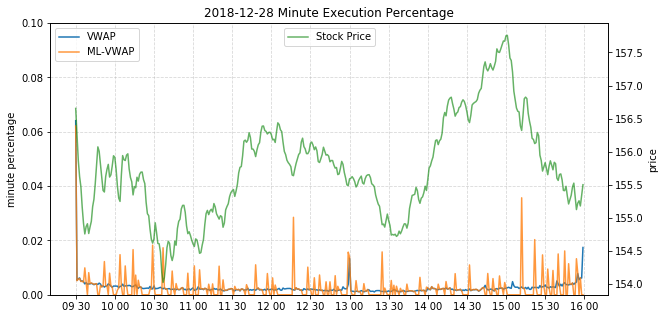

In [21]:
# average stock price series
avg_p = data[['time', 'average_price']]
# print(avg_p)
avg_p.time = avg_p.time.apply(lambda x: x.date())
avg_p_gp = avg_p.groupby('time')
avg_pt = avg_p_gp.get_group(dt.date(2018, 12, 28))


#####stratege overview
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax1.grid(True, linestyle="--", alpha=0.5)
ax1.plot(vwap_vol)
ax1.plot(execution_strategy.execution_PDF, alpha=0.8)
ax1.set_ylim([0, 0.1])
ax1.set_ylabel('minute percentage')
ax1.legend(labels=['VWAP', 'ML-VWAP'], loc='upper left')

ax2 = ax1.twinx()
ax2.plot(VWAP.execution_percent[T].index, avg_pt['average_price'], alpha=0.6, color='g')
ax2.legend(labels=['Stock Price'], loc='upper center')
ax2.set_ylabel('price')

plt.xticks(np.arange(0, len(time_ticker), 30), time_ticker[0:len(time_ticker):30], fontsize=8)
plt.title('%s Minute Execution Percentage' % T.strftime('%Y-%m-%d'))
plt.show()
plt.close()

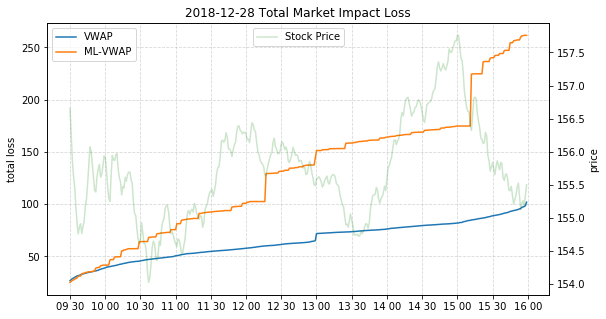

In [22]:
#####market_impact loss
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(111)
ax1.grid(True, linestyle="--", alpha=0.5)
ax1.plot(VWAP.market_impact[T])
ax1.plot(np.cumsum(execution_strategy.market_impact))
ax1.set_ylabel('total loss')
ax1.legend(labels=['VWAP', 'ML-VWAP'], loc='best')

ax2 = ax1.twinx()
ax2.plot(VWAP.market_impact[T].index, avg_pt['average_price'], alpha=0.2, color='g')
ax2.legend(labels=['Stock Price'], loc='upper center')
ax2.set_ylabel('price')

plt.xticks(np.arange(0, len(time_ticker), 30), time_ticker[0:len(time_ticker):30], fontsize=8)
plt.xlabel('time')
plt.title('%s Total Market Impact Loss' % T.strftime('%Y-%m-%d'))
plt.show()
plt.close()

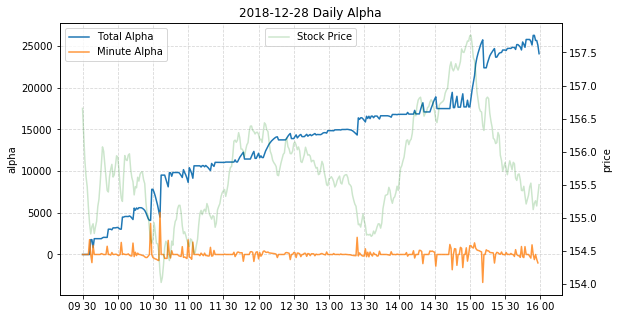

In [23]:
#####strategy alpha compared with vwap
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(111)
ax1.grid(True, linestyle="--", alpha=0.5)
daily_alpha = execution_strategy.signal_alpha
ax1.plot(daily_alpha)
# print(type(np.diff(daily_alpha)), type(daily_alpha[0]))
ax1.plot([daily_alpha[0]] + np.diff(daily_alpha), alpha=0.8)
ax1.set_ylabel('alpha')
ax1.legend(labels=['Total Alpha', 'Minute Alpha'], loc='best')

ax2 = ax1.twinx()
ax2.plot(VWAP.market_impact[T].index, avg_pt['average_price'], alpha=0.2, color='g')
ax2.legend(labels=['Stock Price'], loc='upper center')
ax2.set_ylabel('price')

plt.xticks(np.arange(0, len(time_ticker), 30), time_ticker[0:len(time_ticker):30], fontsize=8)
plt.xlabel('time')
plt.title('%s Daily Alpha' % T.strftime('%Y-%m-%d'))
plt.show()
plt.close()

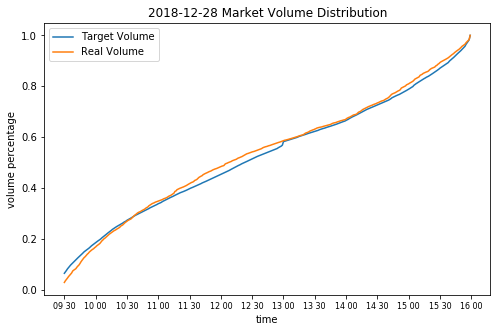

In [24]:
#####target cdf and real volume cdf
# compute real cdf
data = data.loc[:,['time','open','high','low','close','volume','average_price','logistic_prob','direction']]
date = dt.datetime.strptime('2018-12-28',"%Y-%m-%d")
#data = data.where((data.time >= dt.date(2018, 12, 18)) & (data.time < dt.date(2018, 12, 19)))
data = data.where( (data.time >= pd.Timestamp(date.date())) & (data.time < pd.Timestamp(date.date()+dt.timedelta(days=1))) )
data = data.dropna()
real = np.cumsum(data['volume'])/np.sum(data['volume'])

fig = plt.figure(figsize=(8, 5))
plt.plot(execution_strategy.CDF.tolist())
plt.plot(real.tolist())
plt.legend(["Target Volume", "Real Volume"])
plt.xticks(np.arange(0, len(time_ticker), 30), time_ticker[0:len(time_ticker):30], fontsize=8)
plt.xlabel('time')
plt.ylabel('volume percentage')
plt.title('%s Market Volume Distribution' % T.strftime('%Y-%m-%d'))
plt.show()
plt.close()

In [ ]:
###########Period analysis
data_test = execution_strategy.data
tradingday = list(np.unique(data_test.time.apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))))
revenue = []
market_impact = []
days = []
for day in tradingday:
    try:
        execution_strategy._VWAP(day)
        revenue.append(execution_strategy.signal_alpha[-1])
        market_impact.append(sum(execution_strategy.market_impact))
        days.append(day)
    except:
        pass

#####strategy period alphas
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
ax1.yaxis.grid(True, linestyle="--", alpha=0.5)
ax1.bar(days, revenue)
plt.xticks(fontsize=8)
plt.xlabel('date')
plt.ylabel('alpha')
# plt.ylim([0, 60000])
plt.title('2018/12/17-12/31 Strategy Daily Alphas')
plt.show()
plt.close()